In [9]:
import cartopy.crs as ccr
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt

sys.path.append('..')

from noaa.ghcnd import NOAAStore

In [10]:
nyc_region_stations = {
    'USW00094728' : 'NYC', #	NY CITY CNTRL PARK
    'USW00014732' : 'LGA', #	LAGUARDIA AP
    'USW00014734' : 'EWR', #	NEWARK LIBERTY INTL AP
    'USW00094789' :	'JFK', #    JFK INTL AP
    'USW00094745' : 'HPN', #	WESTCHESTER CO AP
    'USW00094702' : 'BDR', #	IGOR I SIKORSKY MEM AP
    'USW00014737' : 'ABE', #	ALLENTOWN LEHIGH VLY INTL AP
    'USW00013739' : 'PHL', #	PHILA INTL AP
    # 'USW00014752' : 'HFD', #	HARTFORD BRAINARD FLD
    'USW00014777' : 'AVP', #	WILKES-BARRE/SCRANTON INTL AP
    'USW00014740' : 'BDL', #	HARTFORD-BRADLEY INTL AP
    'USW00013735' : 'MIV', #    MILLVILLE MUNI AP
    'USW00013781' : 'ILG', #	WILMINGTON NEW CASTLE CO AP
}

In [11]:
store = NOAAStore()
stations = store.stations()

In [12]:
nyc_region_stations_info = stations.loc[nyc_region_stations.keys()]
nyc_region_stations_info.index = nyc_region_stations.values()
nyc_region_stations_info

,latitude,longitude,elevation,state,name,country
NYC,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,US
LGA,40.7794,-73.8803,3.0,NY,LAGUARDIA AP,US
EWR,40.6828,-74.1692,1.8,NJ,NEWARK LIBERTY INTL AP,US
JFK,40.6392,-73.7639,2.7,NY,JFK INTL AP,US
HPN,41.0622,-73.7044,112.8,NY,WESTCHESTER CO AP,US
BDR,41.1642,-73.1267,1.8,CT,IGOR I SIKORSKY MEM AP,US
ABE,40.6497,-75.4478,117.3,PA,ALLENTOWN LEHIGH VLY INTL AP,US
PHL,39.8733,-75.2269,2.1,PA,PHILA INTL AP,US
AVP,41.3336,-75.7228,289.9,PA,WILKES-BARRE/SCRANTON INTL AP,US
BDL,41.9375,-72.6819,51.5,CT,HARTFORD-BRADLEY INTL AP,US


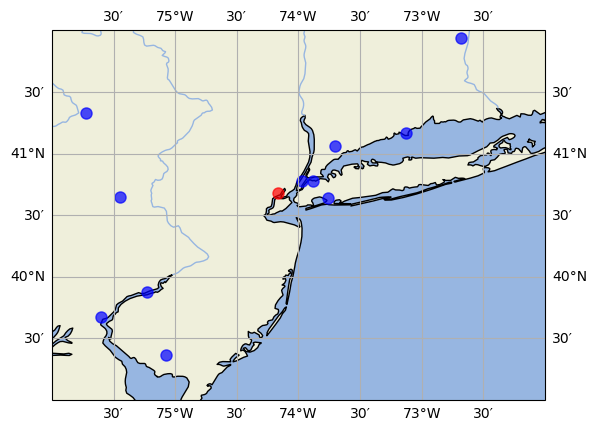

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-76, -72 ,39, 42], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for station, x in nyc_region_stations_info.iterrows():
     color = 'red' if station == 'EWR' else 'blue'
     
     ax.plot(x['longitude'], x['latitude'],
             marker='o',
             color=color,
             markersize=8,
            alpha=0.7,
            transform=ccrs.Geodetic()
     )